In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from scipy import interpolate
import pickle

import Functions

In [2]:
Path1 = '/global/homes/l/lianming/data/GSN_IDEAL_zALL_p1day'
Path2 = '/global/homes/l/lianming/data/GSN_IDEAL_zALL_36min'
Path3 = '/global/homes/l/lianming/data/GSN_IDEAL_z02'
PathTest = '/global/homes/l/lianming/data/For_Test'

In [4]:
PathsDict = Functions.GetEventPaths(Path1)
EventNames = list(PathsDict.keys())

TargetPath = '/global/homes/l/lianming/' + 'Fits1day'

In [5]:
#Parameter setting

EventNames = EventNames

Bands = ['u ', 'g ', 'r ', 'i ', 'z ', 'Y ']

StartFile = 0
EndFile = None

StartObject = 0
EndObject = None

In [7]:
#Result structure ObjFits[Band][ObjNo], save a file for eath event.
os.mkdir(TargetPath)
os.chdir(TargetPath)

with open('EventName.npy', 'wb') as f:
    np.save(f, EventNames)

# np.save('/EventName.npy', EventNames)

for EventName in EventNames:

    print('Processing {:<25}'.format(EventName+':'), end='')
    start = time.time()

    ObjFits = {'u': [], 'g': [], 'r': [], 'i': [], 'z': [], 'Y': []}

    EventPath = PathsDict[EventName]
    FileNames = os.listdir(EventPath)
    FileNames.sort()

    for FileName in FileNames[StartFile: EndFile]:
        
        Ind = FileName.find('HEAD')
        
        if Ind > -1:

            print('|', end='')
            
            FileNamePHOT = FileName[:Ind] + 'PHOT.FITS.gz'
            
            HeadFilePath = os.path.join(EventPath, FileName)
            PhotFilePath = os.path.join(EventPath, FileNamePHOT)
            Data = Functions.read_snana_fits(HeadFilePath, PhotFilePath)
            
            for II, Obj in enumerate(Data[StartObject: EndObject]):
                
                for Band in Bands:

                    Mask = Obj['BAND']==Band

                    fobject  = interpolate.interp1d(Obj['MJD'][Mask], Obj['SIM_MAGOBS'][Mask])
                    ObjFits[Band[0]].append(fobject)
                    
    TimeRange = [Obj['MJD'][Mask][0], Obj['MJD'][Mask][-1]]    
        
    with open(EventName+'_Fit.pkl', 'wb') as f:
        pickle.dump(ObjFits, f)
        pickle.dump(TimeRange, f )    
            
    end = time.time()
    print('\t time spent: {0:6.3f} s'.format(end-start))
    

FileExistsError: [Errno 17] File exists: '/global/homes/l/lianming/Fits1day'

In [82]:
#Result structure AllObjFits[EventName][Band][ObjNo], all events in one file. 
AllObjFits = {}
TimeRange = {}

for EventName in EventNames:

    print('Processing {:<25}'.format(EventName+':'), end='')
    start = time.time()

    AllObjFits[EventName] = {'u': [], 'g': [], 'r': [], 'i': [], 'z': [], 'Y': []}

    EventPath = PathsDict[EventName]
    FileNames = os.listdir(EventPath)
    FileNames.sort()

    for FileName in FileNames[StartFile: EndFile]:
        
        Ind = FileName.find('HEAD')
        
        if Ind > -1:

            print('|', end='')
            
            FileNamePHOT = FileName[:Ind] + 'PHOT.FITS.gz'
            
            HeadFilePath = os.path.join(EventPath, FileName)
            PhotFilePath = os.path.join(EventPath, FileNamePHOT)
            Data = Functions.read_snana_fits(HeadFilePath, PhotFilePath)
            
            for II, Obj in enumerate(Data[StartObject: EndObject]):
                
                for Band in Bands:

                    Mask = Obj['BAND']==Band

                    fobject  = interpolate.interp1d(Obj['MJD'][Mask], Obj['SIM_MAGOBS'][Mask])
                    AllObjFits[EventName][Band[0]].append(fobject)
                    
    TimeRange[EventName] = [Obj['MJD'][Mask][0], Obj['MJD'][Mask][-1]]
            
    end = time.time()
    print('\t time spent: {0:6.3f} s'.format(end-start))
    

Processing AGN:                     ||||||||||||||||||||	 time spent: 13.362 s
Processing CART:                    ||||||||||||||||||||	 time spent: 14.742 s
Processing EB:                      ||||||||||||||||||||	 time spent: 14.372 s
Processing ILOT:                    ||||||||||||||||||||	 time spent:  6.809 s
Processing KN_B19:                  ||||||||||||||||||||	 time spent: 13.568 s
Processing KN_K17:                  ||||||||||||||||||||	 time spent: 14.342 s
Processing MIRA:                    ||||||||||||||||||||	 time spent: 14.062 s
Processing Mdwarf:                  ||||||||||||||||||||	 time spent: 14.892 s
Processing PISN:                    ||||||||||||||||||||	 time spent: 13.751 s
Processing RRL:                     ||||||||||||||||||||	 time spent: 14.804 s
Processing SLSN-I:                  ||||||||||||||||||||	 time spent: 13.790 s
Processing SNII-NMF:                ||||||||||||||||||||	 time spent: 13.707 s
Processing SNII-Templates:          ||||||||||||||||

In [19]:
TimeRange

{'AGN': [53100.0, 53120.0],
 'CART': [53100.0, 53120.0],
 'EB': [53100.0, 53120.0],
 'ILOT': [53100.0, 53120.0],
 'KN_B19': [53100.0, 53120.0],
 'KN_K17': [53100.0, 53120.0],
 'MIRA': [53100.0, 53120.0],
 'Mdwarf': [53100.0, 53120.0],
 'PISN': [53100.0, 53120.0],
 'RRL': [53100.0, 53120.0],
 'SLSN-I': [53100.0, 53120.0],
 'SNII-NMF': [53100.0, 53120.0],
 'SNII-Templates': [53100.0, 53120.0],
 'SNIIn': [53100.0, 53120.0],
 'SNIa-91bg': [53100.0, 53120.0],
 'SNIa-SALT2': [53100.0, 53120.0],
 'SNIax': [53100.0, 53120.0],
 'SNIbc-MOSFIT': [53100.0, 53120.0],
 'SNIbc-Templates': [53100.0, 53120.0],
 'TDE': [53100.0, 53120.0],
 'V19_CC+HostXT': [53100.0, 53120.0],
 'uLens-Binary': [53100.0, 53120.0],
 'uLens-Single-GenLens': [53100.0, 53120.0],
 'uLens-Single_PyLIMA': [53100.0, 53120.0]}

In [ ]:
XX = np.linspace(53090, 53120)

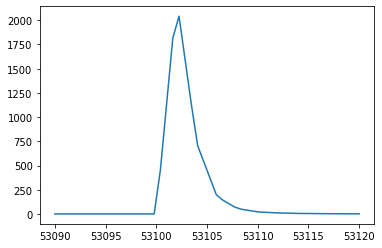

In [ ]:
plt.plot(XX, AllObjFits['KN_B19_0002_00000']['Y'](XX))

In [43]:
with open('AllObjFits1day.pkl', 'wb') as f:
    pickle.dump(AllObjFits, f)
    pickle.dump(TimeRange, f )    

In [78]:
with open('AllObjFits1day.pkl', 'rb') as f:
    AllObjFits_loaded = pickle.load(f)
    TimeRange_loaded = pickle.load(f)


In [85]:
AllObjFits_loaded == AllObjFits

False

In [84]:
TimeRange_loaded == TimeRange

True

In [81]:
TimeRange

[53100.0, 53120.0]

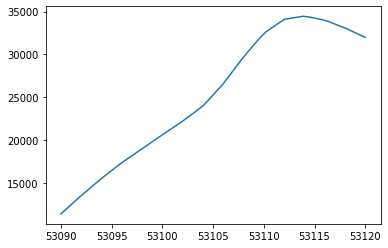

In [ ]:
plt.plot(XX, AllObjFits_loaded['SNIax_0002_00000']['Y'](XX))

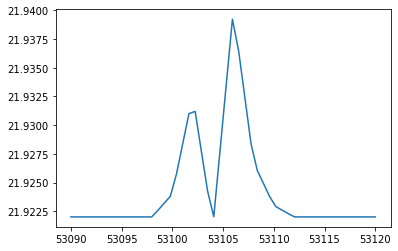

In [ ]:
plt.plot(XX, AllObjFits_loaded['EB']['u'][0](XX))

In [6]:
PathInterpTest = '/content/drive/MyDrive/LSST/PLAsTiCC/Data/Test_Interp/'
PathInterp1Day = 

PathInterp = PathInterpTest
EventNames = np.load(PathInterp+'EventName.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/LSST/PLAsTiCC/Data/Test_Interp/EventName.npy'

In [10]:
aa = np.zeros([5,5], dtype=np.float32)

In [11]:
np.save('Test', aa)